### Analyse der Wortfrequenzen und Co-Occurrences in Artikeltexte

In diesem Notebook erfolgt eine quantitativ-explorative Analyse der gescrapten Artikeltexte zu ausgewählten Keywords (BVG, HVV, MVG etc.).
Ziel ist es, zentrale Schlagworte zu identifizieren und zu untersuchen, welche Begriffe besonders häufig gemeinsam auftreten (Co-Occurrence-Analyse).

Die zugrunde liegenden Artikeldaten stammen aus dem vorherigen Scraping-Prozess (05_artikeltexte_scrapen) und enthalten ausschließlich den bereinigten Artikeltext ohne Headlines.
Nach der Aufbereitung werden Wortfrequenzen gezählt, Partnerwörter ermittelt und Ergebnisse in unterschiedlichen Visualisierungsformen dargestellt.

Ergebnisse:
- Häufigste Begriffe über alle Artikel und Zeiträume
- Co-Occurrence-Analyse zur Ermittlung typischer Wortpaare
- Visualisierung in Form von Diagrammen und Word Clouds

Die berechneten Frequenz- und Co-Occurrence-Tabellen werden als CSV-Dateien gespeichert und dienen als Grundlage für die abschließende vergleichende Analyse mit den BVG-Pressemitteilungen

#### 1. Import benötigte Pakete

In [331]:
# Import benötigte Pakete
import os # Dateipfaden
import pandas as pd # Tabellenverarbeitung (DataFrames)

# Visualisierung 
import matplotlib.pyplot as plt  # Diagramme zeichnen

# Eigene Funktionen (ausgelagert)
import sys  # Systemfunktionen 
sys.path.append("..") # Pfad zu .py Datei
from scripts.wortfrequenz import (
    keyword_gruppe,
    häufigkeit_keywords,
    nennungen_pro_jahr,
    plot_oepnv_trend,
    plot_wordclouds_gesamt,
    analyse_wortformen
    )

In [332]:
# Pfade 
# Projektverzeichnis 
PROJECT_ROOT = r"D:/DBU/ADSC11 ADS-01/Studienarbeit/newspaper-scraping"

# Datei für die Analyse
DATAPATH = os.path.join(PROJECT_ROOT, "output", "artikel_counts.csv")

# Output
OUTPUT_PATH = os.path.join(PROJECT_ROOT, "output")
CO_OCCURRENCE_YEAR_BVG = os.path.join(OUTPUT_PATH, "co_occurrence_year_bvg.csv")
CO_OCCURRENCE_TOTAL_BVG = os.path.join(OUTPUT_PATH, "co_occurrence_total_bvg.csv")

CO_OCCURRENCE_YEAR_BENCHMARK = os.path.join(OUTPUT_PATH, "co_occurrence_year_benchmark.csv")
CO_OCCURRENCE_TOTAL_BENCHMARK = os.path.join(OUTPUT_PATH, "co_occurrence_total_benchmark.csv")

#### 2. Wortfrequenzanalyse

##### 2.1 Datenexploration

In [333]:
# CSV-Dateien einlesen
df_freq = pd.read_csv(DATAPATH)

In [334]:
# Anzahl Zeilen und Spalten
df_freq.shape

(235661, 8)

In [335]:
# Spaltennamen
df_freq.columns

Index(['word', 'count', 'source', 'cluster', 'date', 'url', 'keyword', 'year'], dtype='object')

In [336]:
# Erste Artikelzeilen anzeigen
df_freq.head()

,word,count,source,cluster,date,url,keyword,year
0,freiheit,4,sz,Große Medien,2021-04-01,https://www.sueddeutsche.de/muenchen/muenchen-...,mvg,2021
1,münchner,4,sz,Große Medien,2021-04-01,https://www.sueddeutsche.de/muenchen/muenchen-...,mvg,2021
2,april,4,sz,Große Medien,2021-04-01,https://www.sueddeutsche.de/muenchen/muenchen-...,mvg,2021
3,sonntag,3,sz,Große Medien,2021-04-01,https://www.sueddeutsche.de/muenchen/muenchen-...,mvg,2021
4,sz,3,sz,Große Medien,2021-04-01,https://www.sueddeutsche.de/muenchen/muenchen-...,mvg,2021


In [337]:
# Anzahl Arktikel pro Medium
anzahl_pro_source = df_freq[["url", "source"]].drop_duplicates().value_counts("source")
anzahl_pro_source

source
abendblatt      584
berliner        560
tagesspiegel    402
taz              66
sz               38
ntv              36
zeit             23
spiegel          21
welt             20
heise            10
stern             7
faz               6
dlf               5
netzpolitik       4
tagesschau        3
boerse            3
mm                2
t3n               2
Name: count, dtype: int64

In [338]:
# Prüfung fehlende Werte
df_freq.isnull().sum()

word       7
count      0
source     0
cluster    0
date       0
url        0
keyword    0
year       0
dtype: int64

In [339]:
# Duplikate prüfen
df_freq["url"].duplicated().sum()

np.int64(233869)

##### 2.2 Top-Wörter und Zeitverläufe

In [340]:
# Neue Spalte mit Gruppenzuordnung (aus ausgelagerter Funktion)
df_freq["keywords"] = df_freq["word"].apply(keyword_gruppe)

In [341]:
# Absolute und relative Häufigkeit der Begriffe BVG, MVG, HVV-Verbund (HVV, VHH und Hochbahn) in den ausgewählten Medien (aus ausgelagerter Funktion)
wert_counts, wert_prozent = häufigkeit_keywords(df_freq)

# Ergebnis anzeigen
print("Anzahl der Begriffe BVG, MVG, HVV:")
print(wert_counts)
print("\nAnteil der Begriffe BVG, MVG, HVV in %:")
print(wert_prozent)

Anzahl der Begriffe BVG, MVG, HVV:
keywords
bvg            938
hvv-verbund    277
mvg             34
Name: count, dtype: int64

Anteil der Begriffe BVG, MVG, HVV in %:
keywords
bvg            75.10
hvv-verbund    22.18
mvg             2.72
Name: count, dtype: float64


In [342]:
# Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Jahren
# Gruppierung: Nennungen je Jahr und Begriff summieren
df_freq_jahre = nennungen_pro_jahr(df_freq)
df_freq_jahre

keywords,bvg,hvv-verbund,mvg
year,,,
2021,667,31,27
2022,850,71,59
2023,974,185,52
2024,968,252,0
2025,880,82,4


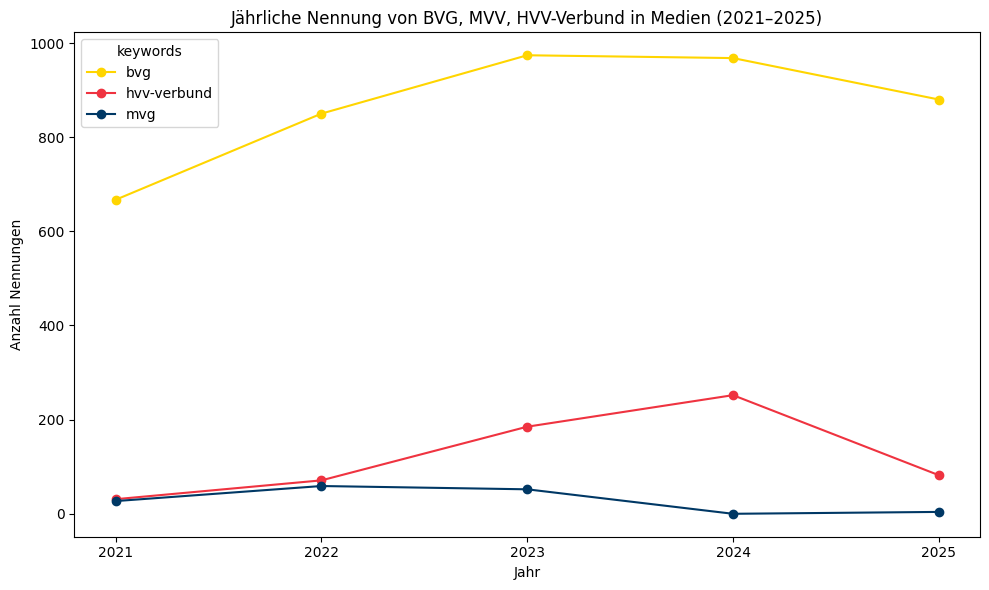

In [343]:
# Plot: Liniendiagramm Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Jahren
# Vorbereitung
# Farbdefinitionen nach CI der Verkerhsunternehmen
farben = {
    "bvg": "#FFD500", # BVG-Gelb          
    "mvg": "#003865", # MVV-Blau
    "hvv-verbund": "#EF3340" # HVV-Rot
}

# Plot erstellen
plot_oepnv_trend(df_freq_jahre, farben)

In [344]:
# Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Medien
# Gruppierung: Häufigkeit der Begriffe je Medium und Begriff summieren
df_freq_quellen = df_freq.groupby(["source", "keywords"])["count"].sum().unstack().fillna(0).astype(int)

# Relative Häufigkeit in %
df_freq_quellen_prozent = df_freq_quellen.div(df_freq_quellen.sum(axis=1), axis=0) * 100

# Anzeigen
print("Absolute Häufigkeit nach Medium:")
print(df_freq_quellen.sort_index())

print("\nRelative Häufigkeit nach Medium (%):")
print(df_freq_quellen_prozent.round(2).sort_index())

Absolute Häufigkeit nach Medium:
keywords       bvg  hvv-verbund  mvg
source                              
abendblatt       1          421    0
berliner      1925           13    1
boerse           0            0    8
faz             12            0    0
heise           44            0    4
netzpolitik     22            0    0
ntv             72           47   10
spiegel         34           21    0
stern           10            6    0
sz              18            0  117
t3n              4            0    0
tagesschau      35            0    0
tagesspiegel  1519           16    0
taz            542           31    0
welt            43           53    0
zeit            58           13    2

Relative Häufigkeit nach Medium (%):
keywords         bvg  hvv-verbund     mvg
source                                   
abendblatt      0.24        99.76    0.00
berliner       99.28         0.67    0.05
boerse          0.00         0.00  100.00
faz           100.00         0.00    0.00
heise      

In [345]:
# Vorbereitung
# Begriffsliste & Farben
begriffsliste = ["bvg", "mvg", "hvv", "vhh", "hochbahn"]

farben = {
    "bvg": "#FFD500", # BVG-Gelb
    "mvg": "#003865", # MVG-Blau
    "hvv": "#EF3340", # HVV-Rot
    "vhh": "#EF3340", # gehört zu HVV
    "hochbahn": "#EF3340" # gehört zu HVV
}

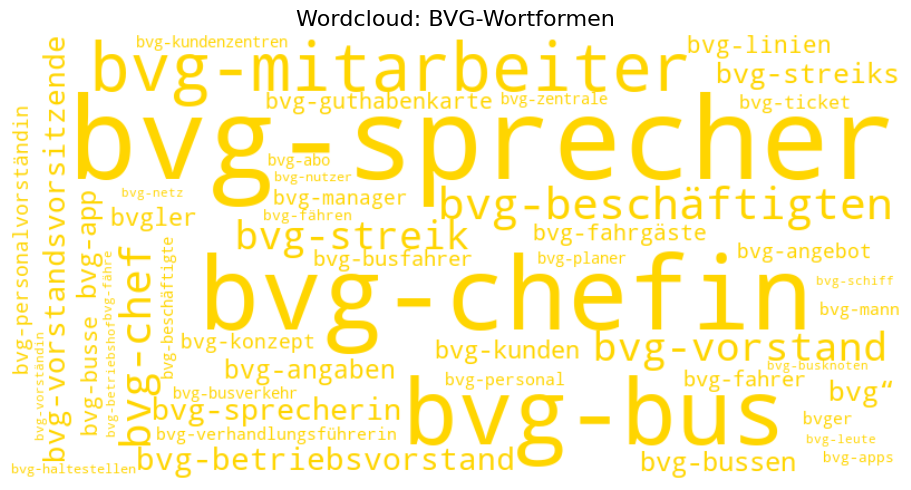

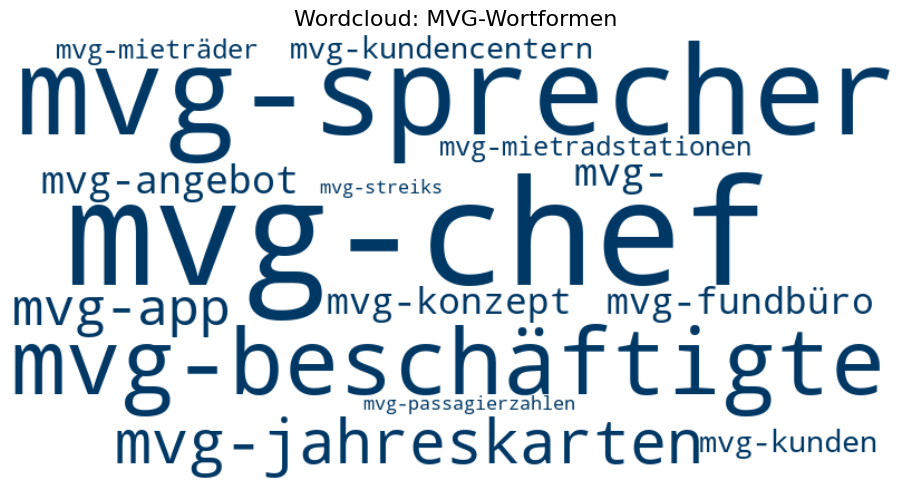

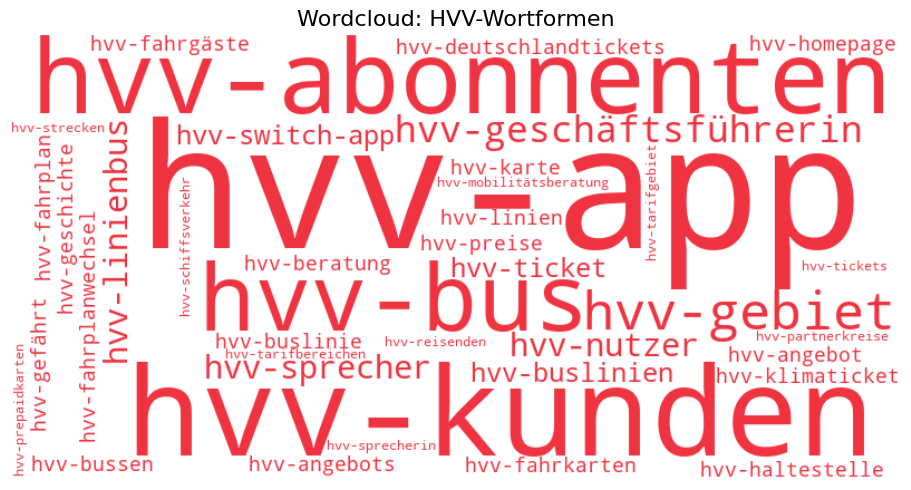

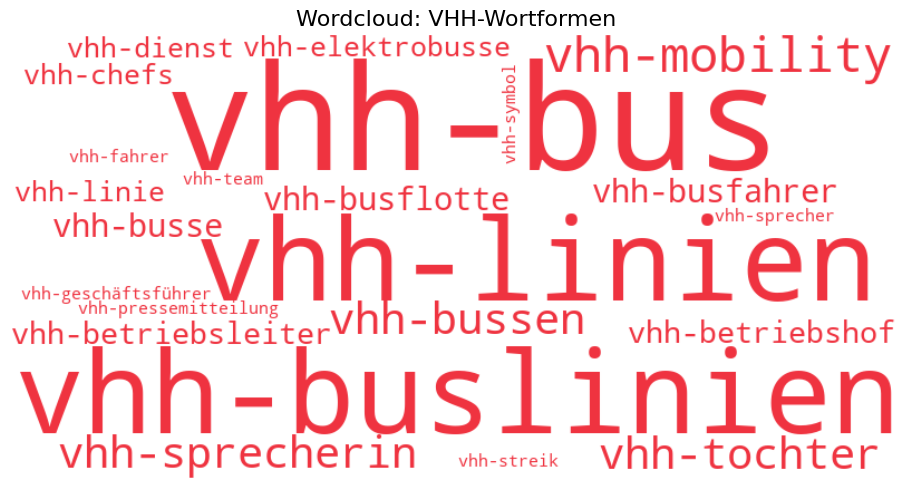

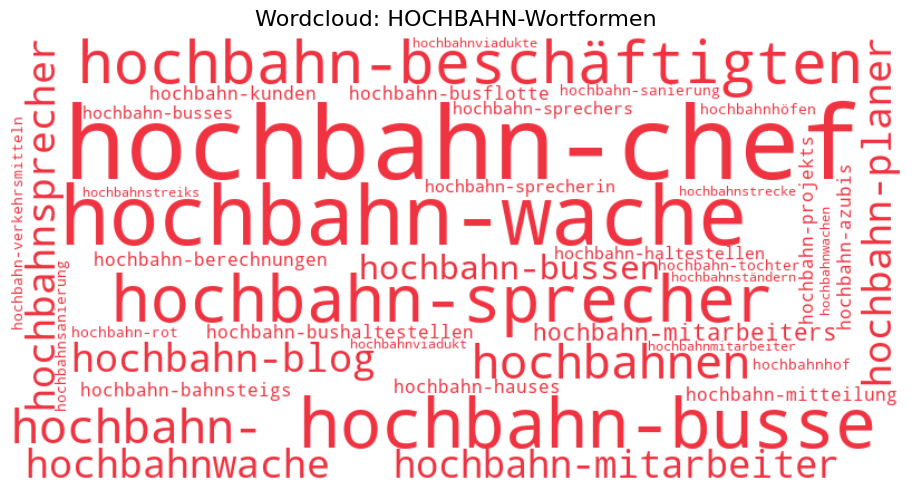

In [346]:
# Plot: Wordclouds für Wortformen, die mit BVG, MVG oder HVV beginnen (alle Jahre zusammengefasst, aus ausgelagerter Funktion)
plot_wordclouds_gesamt(df_freq, begriffsliste, farben)

In [347]:
# Top-Wortformen pro Cluster für BVG 
analyse_wortformen(df_freq, keyword="bvg")


Top-Wortformen mit 'bvg' in Cluster: Digital


,cluster,word,count
0,Digital,bvg,72
2,Digital,bvg-angebot,2
4,Digital,bvg-beschäftigten,2
9,Digital,bvg-personalvorständin,2
10,Digital,bvg-sprecher,2
1,Digital,bvg-angaben,1
3,Digital,bvg-beschäftigte,1
5,Digital,bvg-chef,1
6,Digital,bvg-gremien,1
7,Digital,bvg-guthabenkarte,1



Top-Wortformen mit 'bvg' in Cluster: Große Medien


,cluster,word,count
12,Große Medien,bvg,717
24,Große Medien,bvg-beschäftigten,13
86,Große Medien,bvg-vorstand,9
11,Große Medien,#bvgweilwirunsfürchten,6
73,Große Medien,bvg-sprecher,6
74,Große Medien,bvg-streik,6
29,Große Medien,bvg-chef,5
68,Große Medien,bvg-personalvorständin,4
31,Große Medien,bvg-chefin,3
32,Große Medien,bvg-fahrer,3



Top-Wortformen mit 'bvg' in Cluster: Regional


,cluster,word,count
126,Regional,bvg,3445
351,Regional,bvg-sprecher,69
197,Regional,bvg-chefin,59
181,Regional,bvg-bus,49
290,Regional,bvg-mitarbeiter,44
195,Regional,bvg-chef,31
361,Regional,bvg-streik,27
173,Regional,bvg-beschäftigten,25
396,Regional,bvg-vorstand,25
180,Regional,bvg-betriebsvorstand,20



Top-Wortformen mit 'bvg' in Cluster: Technologie


,cluster,word,count
433,Technologie,bvg,70
435,Technologie,bvg-app,5
444,Technologie,bvg-sprecher,5
434,Technologie,bvg-account,4
439,Technologie,bvg-guthabenkarte,4
437,Technologie,bvg-fahrinfo-app,2
438,Technologie,bvg-geschäftsbericht,2
440,Technologie,bvg-klausel,2
445,Technologie,bvg-zahlenspiegel,2
436,Technologie,bvg-chefin,1



Top-Wortformen mit 'bvg' in Cluster: Öffentlich-rechtlich


,cluster,word,count
447,Öffentlich-rechtlich,bvg,35
448,Öffentlich-rechtlich,bvg-angaben,1
449,Öffentlich-rechtlich,bvg-angebote,1
450,Öffentlich-rechtlich,bvg-beschäftigten,1
451,Öffentlich-rechtlich,bvg-eigenen,1
452,Öffentlich-rechtlich,bvg-reklame,1
453,Öffentlich-rechtlich,bvg-tarifkonflikt,1
454,Öffentlich-rechtlich,bvg-verhandlungsführerin,1
455,Öffentlich-rechtlich,bvg-warnstreik,1
456,Öffentlich-rechtlich,bvg-webseite,1


#### 3. Co-Occurrence-Analyse

##### 3.1 Funktionen für die Co-Occurrence-Analyse

In [348]:
# Funktion: Basis für die Analyse aufbauen
def build_basis(df_freq, keyword):
    df = df_freq.copy()

    # Nur Artikel mit einem Keyword
    df = df[df["keyword"].str.lower() == keyword]

    # Strings + kleinschreiben
    df["word"] = df["word"].astype(str).str.lower()

    # Nur alphabetische Tokens behalten (keine Zahlen, #, /, _ ...)
    df = df[df["word"].str.isalpha()]

    # Bestimmte Wörter entfernen
    stopwords = {"tab", "öffnet", "jahr", "jahre", "jahren", "startseite", "de", "euro", "heißt", "uhr", "montag", 
                 "dienstag", "mittwoch", "donnerstag", "freitag", "samstag", "sonntag", "nachrichten", "hieß", "shop", "lesezeit", "dpa"}
    df = df[~df["word"].isin(stopwords)]
    
    # Menge der Wörter pro Artikel sammeln, Duplikate entfernen
    basis = (df.groupby(["url", "year"])["word"].apply(lambda s: set(s)).reset_index(name="words_set"))

    # Nur Artikel mit Keyword behalten
    basis = basis[basis["words_set"].apply(lambda ws: keyword in ws)]
    return basis

In [349]:
# Funktion: Die häufigsten Wörter in Artikeln zählen, die Keyword enthalten
def count_words(basis, keyword):
    rows = []
    
    # Basisdaten durchgehen
    for _, r in basis.iterrows():
        year = r["year"]
        
        # Jedes Wort betrachten
        for w in r["words_set"]:
            # Keyword selbst nicht mitzählen
            if w == keyword:   # Keyword selbst nicht mitzählen
                continue
            rows.append((w, year))

    # DataFrame mit allen (Wort, Jahr)-Kombinationen
    df_words_year = pd.DataFrame(rows, columns=["word", "year"])
    
    # Zählen, wie oft jedes Wort pro Jahr vorkommt
    df_words_year_count = (df_words_year.groupby(["word", "year"]).size().reset_index(name="count"))

    # Jahresübergreifend
    df_words_total = (df_words_year_count.groupby("word", as_index=False)["count"].sum().sort_values("count", ascending=False))

    return df_words_year_count, df_words_total

In [350]:
# Funktion: Häufigste Partnerwörter (Co-Occurrence) für ein Keyword
def count_partners(basis, keyword):
    rows = []
    for _, r in basis.iterrows():
        year = r["year"]
        co_words = r["words_set"] - {keyword} # Keyword selbst nicht mitzählen
        for w in co_words:
            rows.append((keyword, w, year)) 

    df_co = pd.DataFrame(rows, columns=["word1", "word2", "year"])
    df_co_year_count = (df_co.groupby(["word1", "word2", "year"]).size().reset_index(name="count"))

    # Jahresübergreifend
    df_co_total = (df_co_year_count.groupby(["word1", "word2"])["count"].sum().reset_index().sort_values("count", ascending=False))
    return df_co_year_count, df_co_total

In [351]:
# Funktion: Visualisierung Top-Wörter in Artikeln mit keyword pro Jahr
def plot_top_words_per_year(df_words_year_count, year, keyword, topn=20, farben=None):
    df_y = df_words_year_count[df_words_year_count["year"] == year]
    top = df_y.sort_values("count", ascending=False).head(topn)
    c = farben.get(keyword) if isinstance(farben, dict) else None

    plt.figure(figsize=(10, 6))
    plt.barh(top["word"], top["count"], color=c)
    plt.title(f"Top {topn} Wörter in Artikeln mit {keyword} – {year}")
    plt.xlabel(f"Anzahl Artikel mit {keyword}")
    plt.ylabel("Wort")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [352]:
# Funktion: Visualisierung Top Partnerwörter (Paare: Keyword und Wort) Gesamt
def plot_top_pairs_total(df_co_total, keyword, topn=20, farben=None):
    top = df_co_total.head(topn).copy()
    top["pair"] = top["word1"] + " + " + top["word2"]
    c = farben.get(keyword) if isinstance(farben, dict) else None

    plt.figure(figsize=(10, 6))
    plt.barh(top["pair"], top["count"], color=c)
    plt.title(f"Top {topn} Partnerwörter in Artikeln – {keyword}")
    plt.xlabel("Anzahl Nennungen")
    plt.ylabel("Wortpaar")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [353]:
# Funktion: Visualisierung Top Partnerwörter (Paare: Keyword und Wort) pro Jahr
def plot_top_pairs_per_year(df_co_year_count, year, keyword, topn=20, farben=None):
    df_y = df_co_year_count[df_co_year_count["year"] == year]
    top = (df_y.groupby(["word1","word2"], as_index=False)["count"]
              .sum()
              .sort_values("count", ascending=False)
              .head(topn)
              .copy())
    top["pair"] = top["word1"] + " + " + top["word2"]
    c = farben.get(keyword) if isinstance(farben, dict) else None

    plt.figure(figsize=(10, 6))
    plt.barh(top["pair"], top["count"], color=c)
    plt.title(f"Top {topn} Partnerwörter in Artikeln – {keyword} {year}")
    plt.xlabel("Anzahl Nennungen")
    plt.ylabel("Wortpaar")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [354]:
# Funktion: Visualisierung Zeitverlauf: Trend Partnerwörter von Keyword
def plot_trends_for_partners(df_co_year_count, keyword, partners=None, topk_auto=5, farben=None):
    if partners is None:
        partners = (df_co_year_count.groupby("word2")["count"].sum().sort_values(ascending=False).head(topk_auto).index.tolist())

    df_plot = (df_co_year_count[df_co_year_count["word2"].isin(partners)].groupby(["word2","year"], as_index=False)["count"].sum().sort_values(["word2","year"]))

    c = farben.get(keyword) if isinstance(farben, dict) else None

    plt.figure(figsize=(10, 6))
    for w in partners:
        s = df_plot[df_plot["word2"] == w]
        plt.plot(s["year"], s["count"], marker="o", label=w, color=c)
    plt.title(f"Zeitverlauf Partnerwörter mit {keyword}")
    years = sorted(df_plot["year"].unique())
    plt.xticks(years, [int(y) for y in years])
    plt.xlabel("Jahr")
    plt.ylabel("Anzahl Nennungen")
    plt.legend(title="Partnerwort")
    plt.tight_layout()
    plt.show()

##### 3.2 Co-Occurrence BVG

In [355]:
# Basis für BVG bauen
basis_bvg = build_basis(df_freq, keyword="bvg")

# Anzeigen
basis_bvg.head()

,url,year,words_set
0,https://blogs.taz.de/zylinderkopf/bvg-urteil-z...,2023,"{tagesgeschäfts, runden, signalwirkung, verank..."
2,https://checkpoint.tagesspiegel.de/langmeldung...,2025,"{vergangenen, idee, checkpoint, beliebtesten, ..."
4,https://checkpoint.tagesspiegel.de/langmeldung...,2023,"{kritik, sicherheitspersonals, checkpoint, bel..."
5,https://checkpoint.tagesspiegel.de/langmeldung...,2022,"{checkpoint, beliebtesten, berlins, herausgebe..."
6,https://checkpoint.tagesspiegel.de/langmeldung...,2024,"{checkpoint, beliebtesten, berlins, herausgebe..."


In [356]:
# Top-Wörter mit BVG
df_words_year_count_bvg, df_words_total_bvg = count_words(basis_bvg, "bvg")

# 20 Wörter anzeigen
df_words_total_bvg.head(20)

,word,count
3528,berliner,772
3526,berlin,624
25113,verkehrsbetriebe,497
8126,fahrgäste,478
21900,stand,333
8511,fenster,295
4794,busse,292
24401,unternehmen,290
8042,fahren,276
15717,melden,263


In [357]:
# Top-Partnerwörter mit BVG
co_year_bvg, co_total_bvg = count_partners(basis_bvg, "bvg")

# 20 Wörter anzeigen
co_total_bvg.head(20)

,word1,word2,count
3528,bvg,berliner,772
3526,bvg,berlin,624
25113,bvg,verkehrsbetriebe,497
8126,bvg,fahrgäste,478
21900,bvg,stand,333
8511,bvg,fenster,295
4794,bvg,busse,292
24401,bvg,unternehmen,290
8042,bvg,fahren,276
15717,bvg,melden,263


In [358]:
# Als CSV-Dateien speichern
co_year_bvg.to_csv(CO_OCCURRENCE_YEAR_BVG, index=False)
co_total_bvg.to_csv(CO_OCCURRENCE_TOTAL_BVG, index=False)

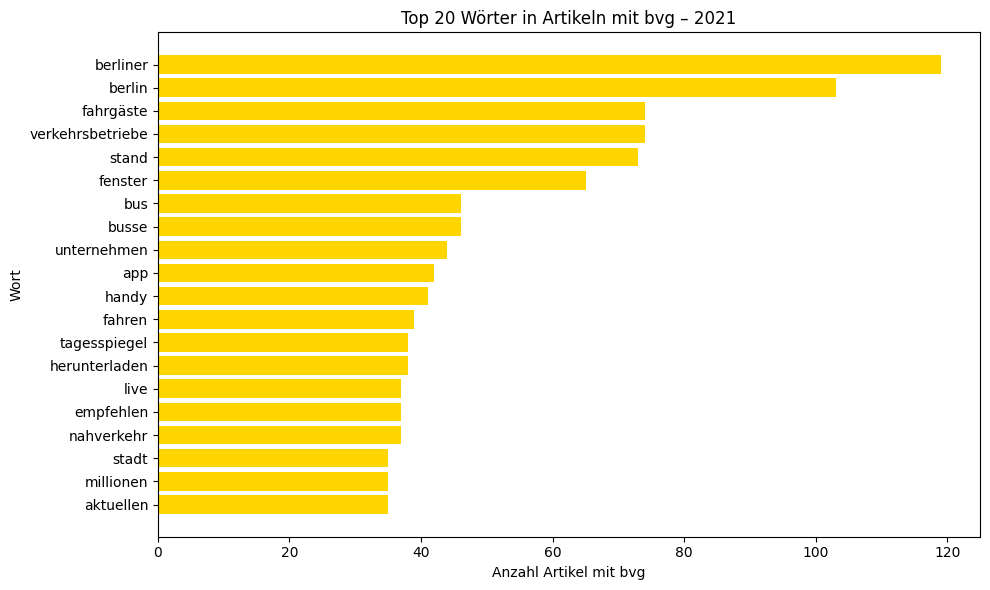

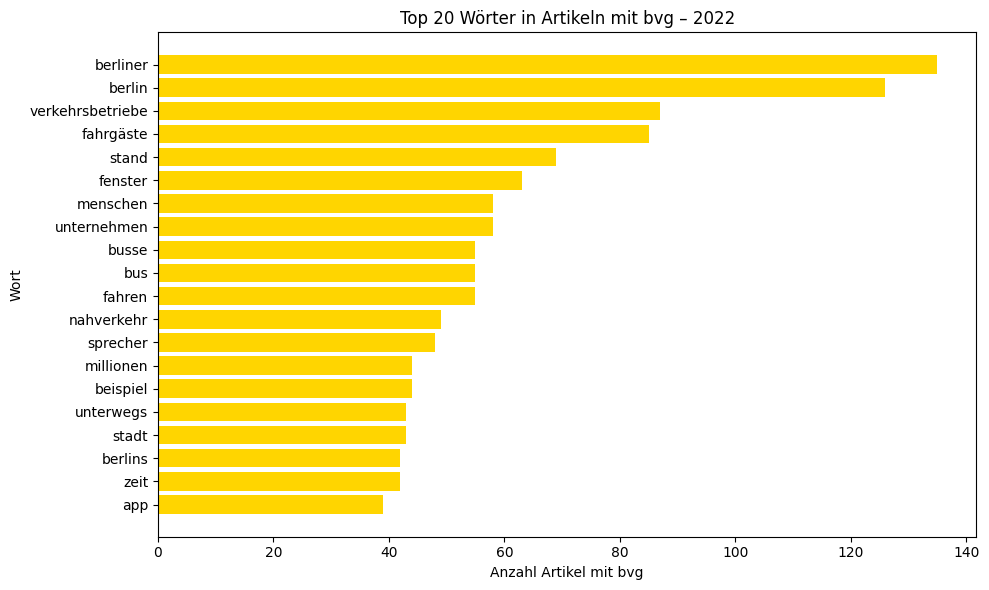

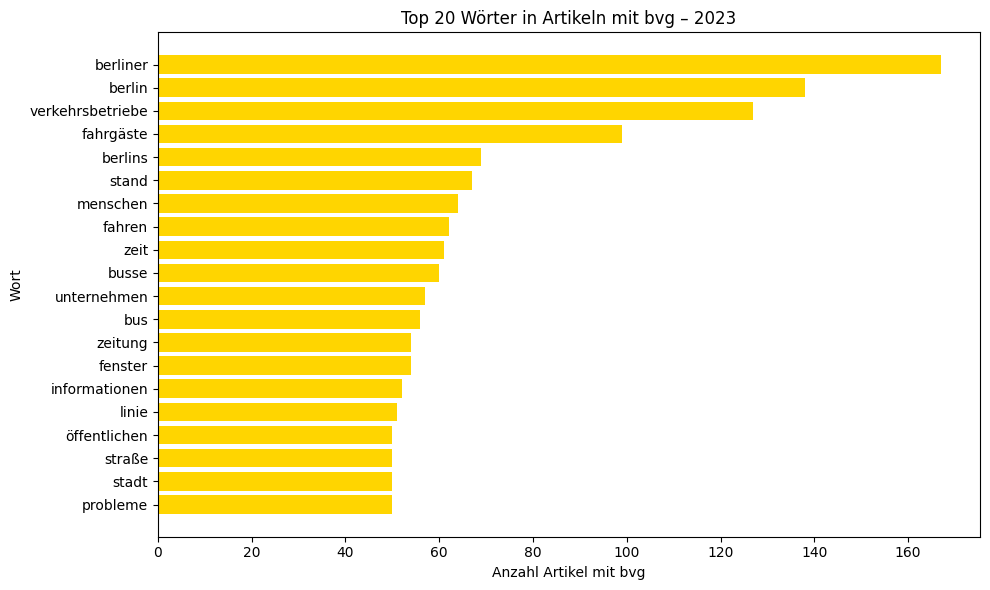

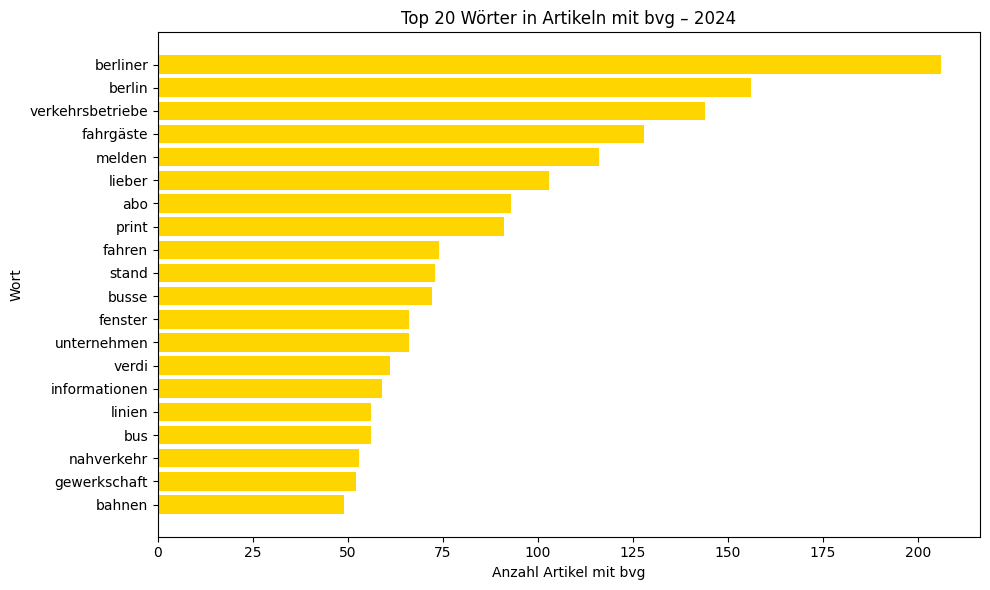

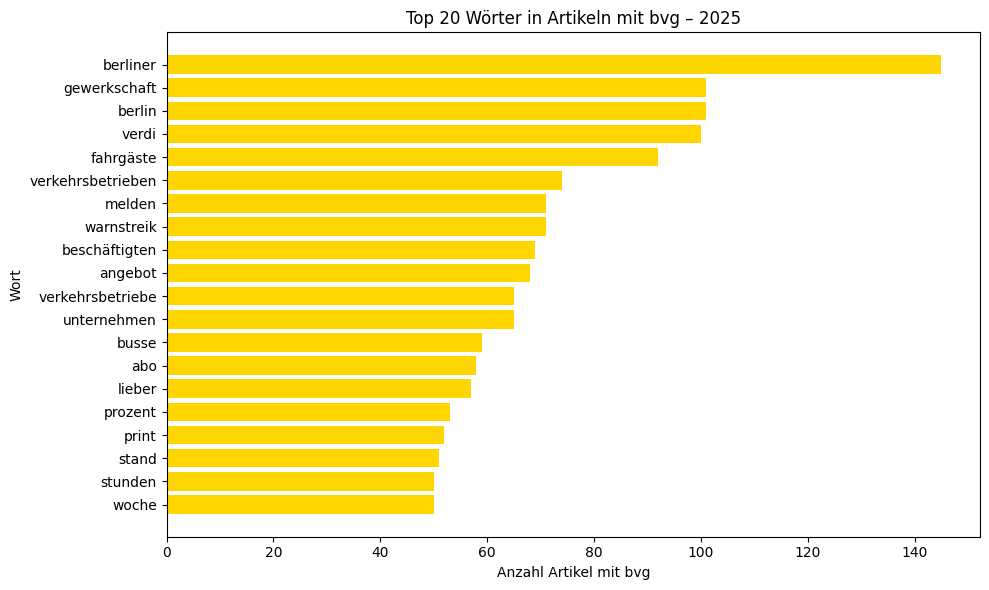

In [359]:
# Balkendiagramm Top-Wörter pro Jahr 
for y in sorted(basis_bvg["year"].dropna().unique()):
    plot_top_words_per_year(df_words_year_count_bvg, year=int(y), keyword="bvg", topn=20, farben=farben)

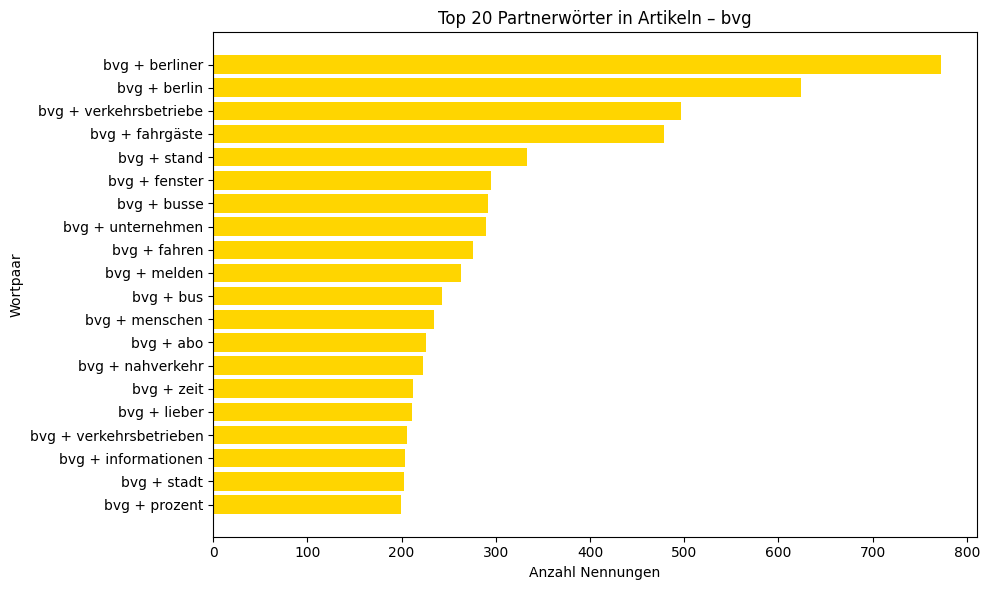

In [360]:
# Balkendiagramm Top Partnerwörter gesamt
plot_top_pairs_total(co_total_bvg, keyword="bvg", topn=20, farben=farben)

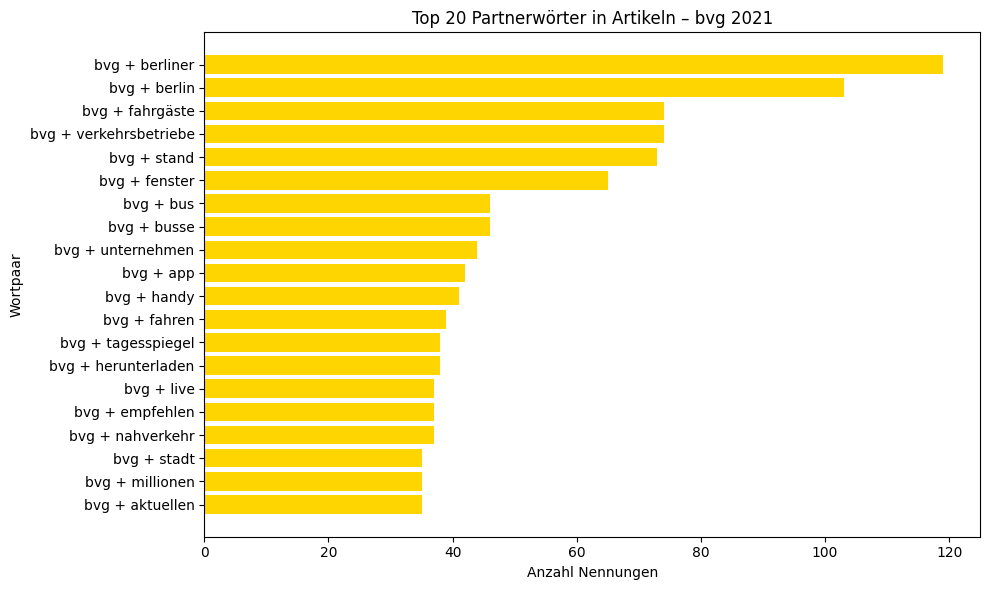

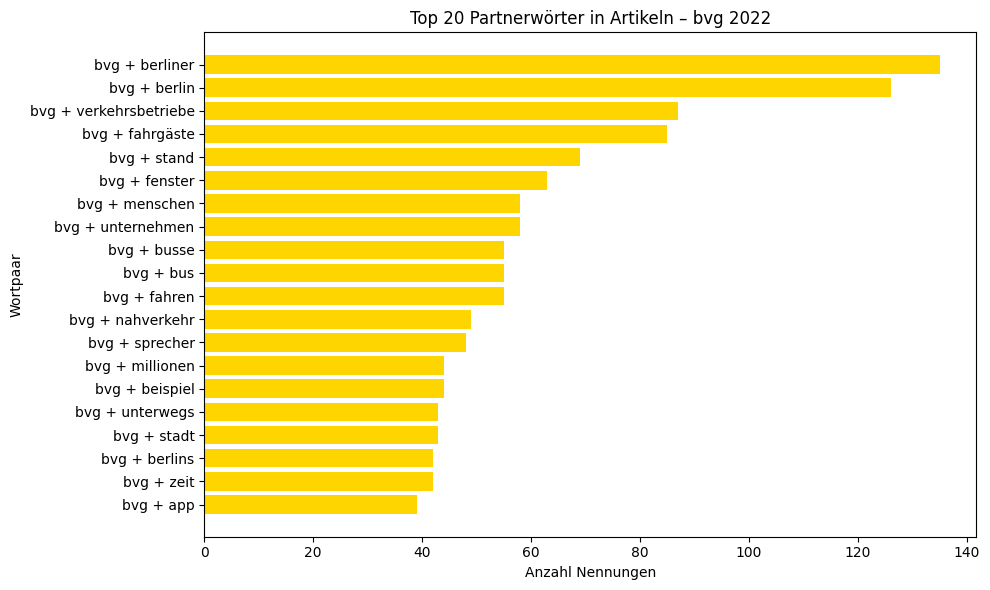

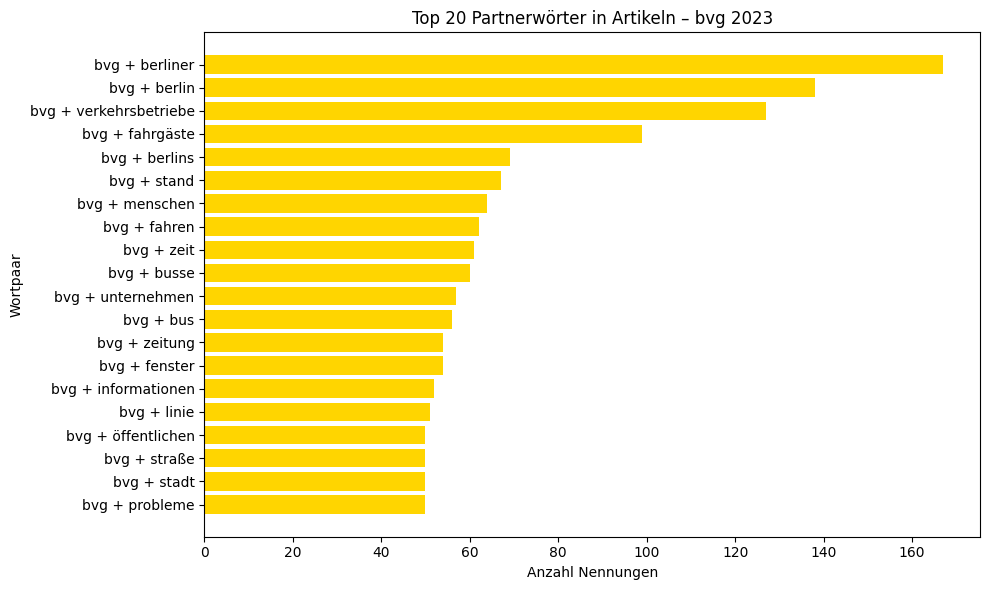

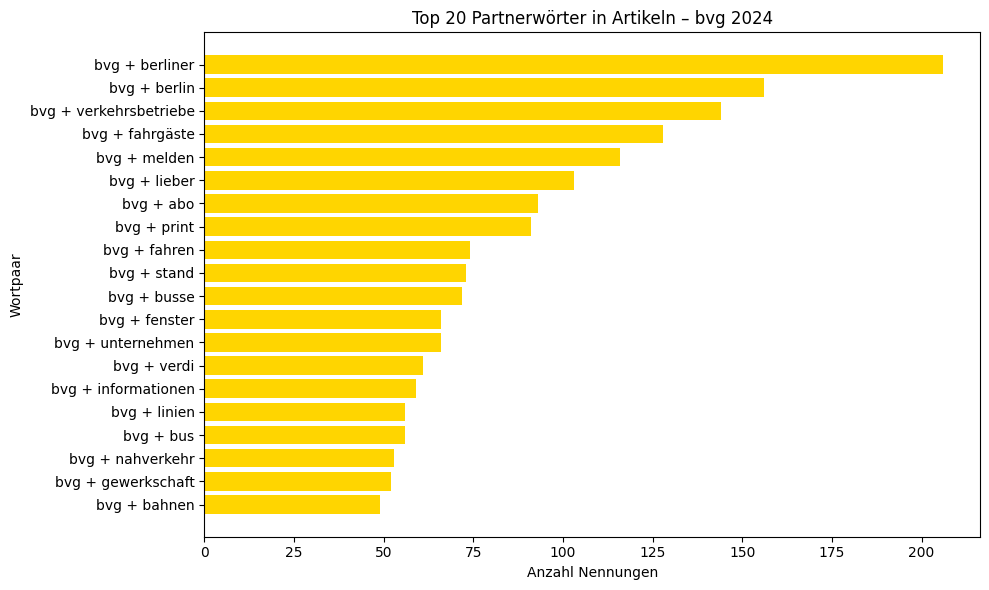

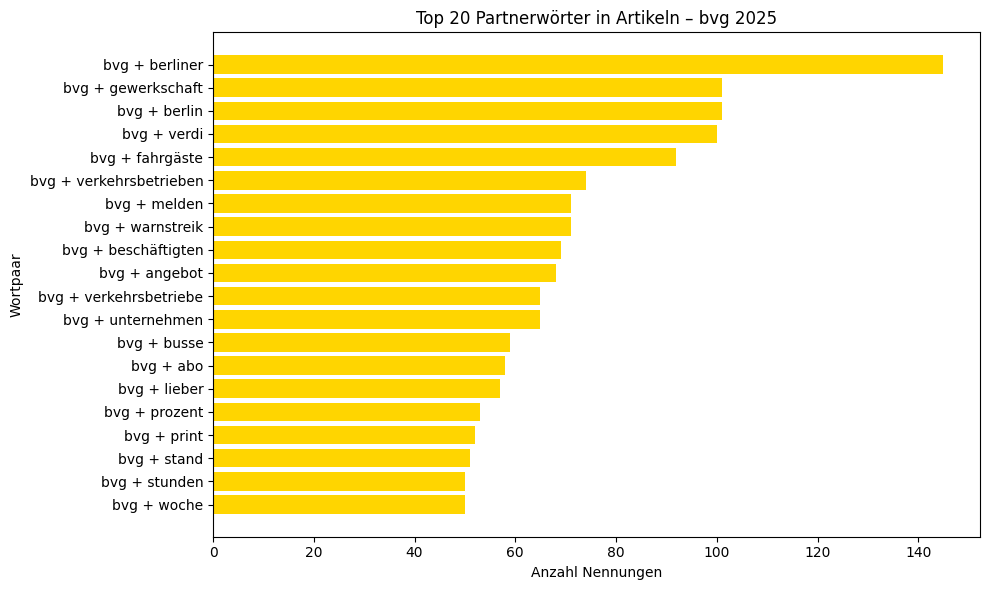

In [361]:
# Balkendiagramm Top Partnerwörter pro Jahr
for y in sorted(basis_bvg["year"].dropna().unique()):
    plot_top_pairs_per_year(co_year_bvg, year=int(y), keyword="bvg", topn=20, farben=farben)

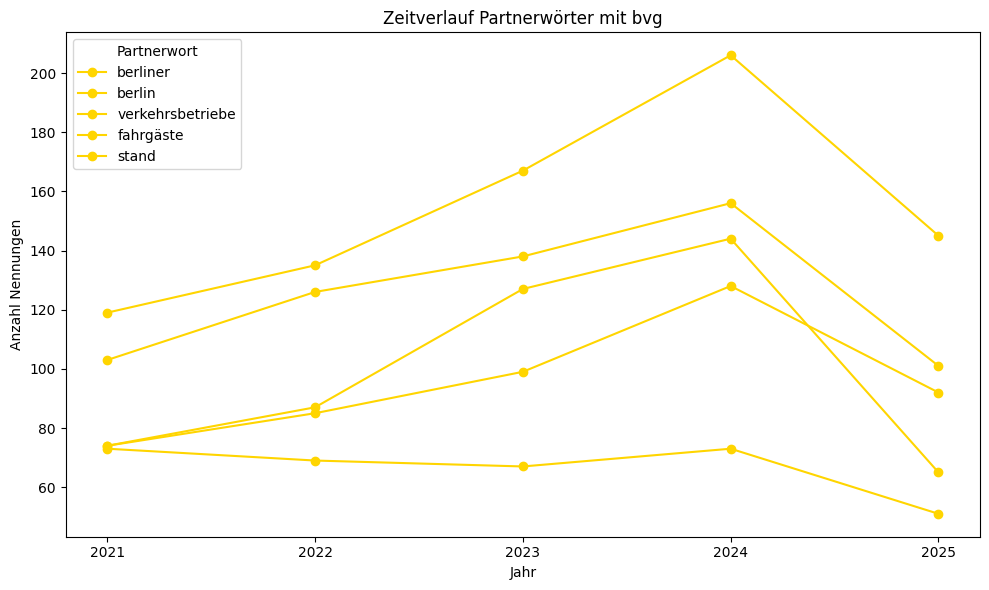

In [362]:
# Liniendiagramm Zeitverlauf Top 5 Partnerwörter
plot_trends_for_partners(co_year_bvg, keyword="bvg", partners=None, topk_auto=5, farben=farben)

##### 3.2 Benchmarks: Vergleich BVG mit HVV und MVG

In [363]:
# Basis vorbereiten
keywords_benchmark = ["hvv", "mvg", "vhh", "hochbahn"]
all_keywords = ["bvg"] + keywords_benchmark

In [364]:
# Co-Occurrence vorbereiten
basis_dict = {kw: build_basis(df_freq, kw) for kw in all_keywords}

co_total_dict = {}
co_year_dict = {}
for kw in all_keywords:
    df_co_year_count, df_co_total = count_partners(basis_dict[kw], kw)
    co_total_dict[kw] = df_co_total
    co_year_dict[kw] = df_co_year_count

In [365]:
# Als CSV-Dateien speichern
df_co_year_count.to_csv(CO_OCCURRENCE_YEAR_BENCHMARK, index=False)
df_co_total.to_csv(CO_OCCURRENCE_TOTAL_BENCHMARK, index=False)

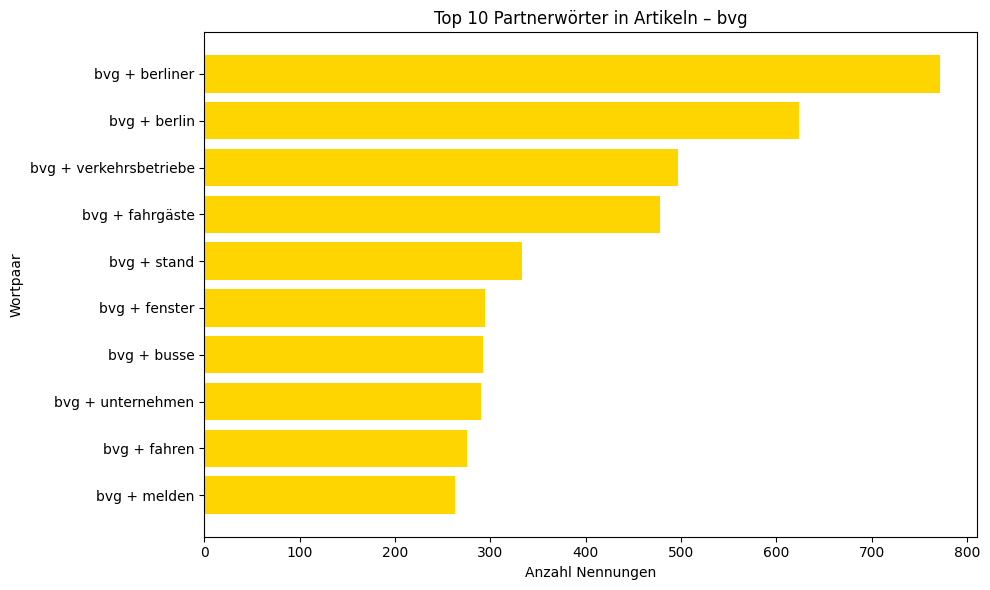

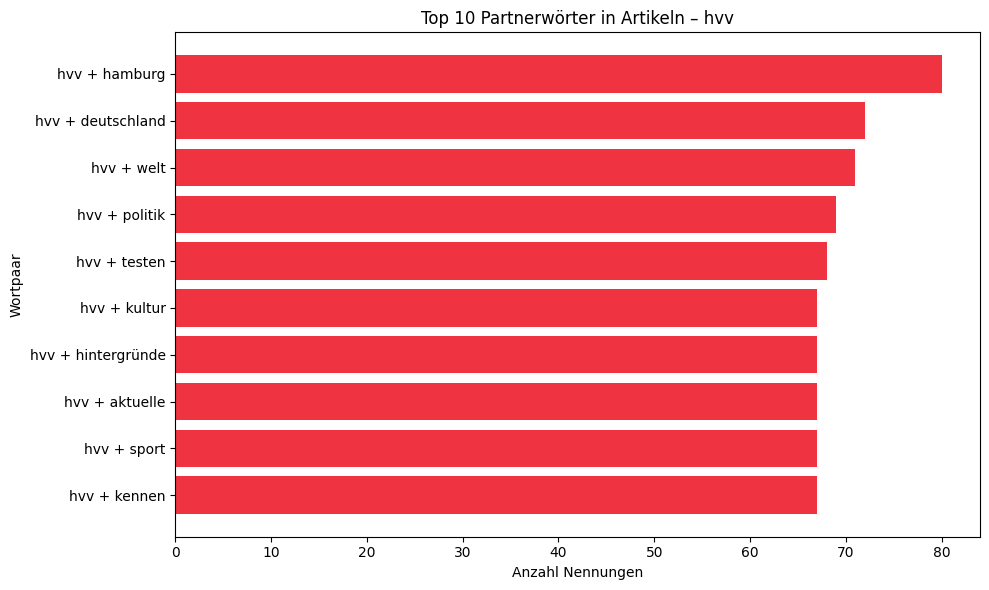

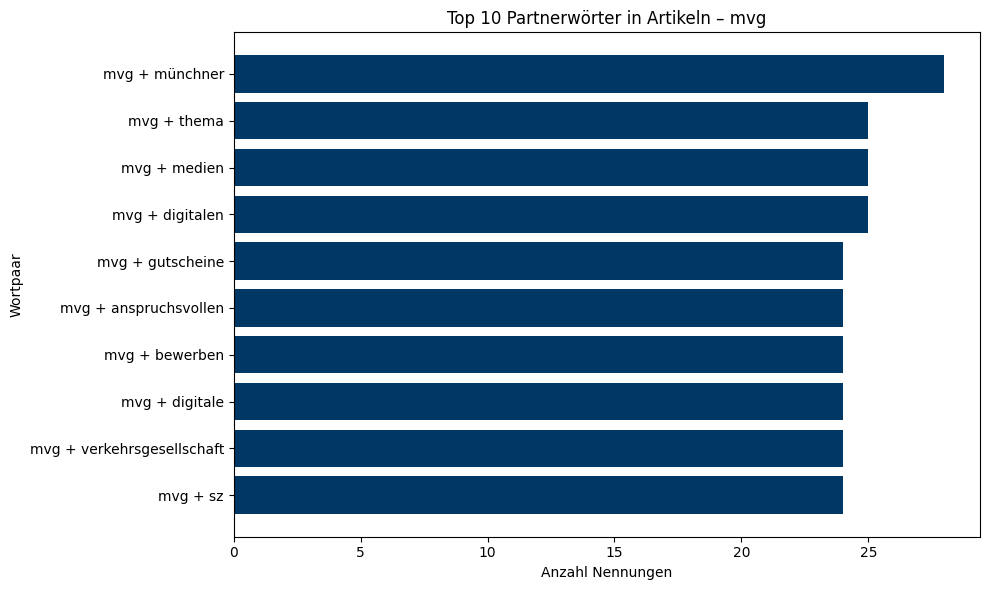

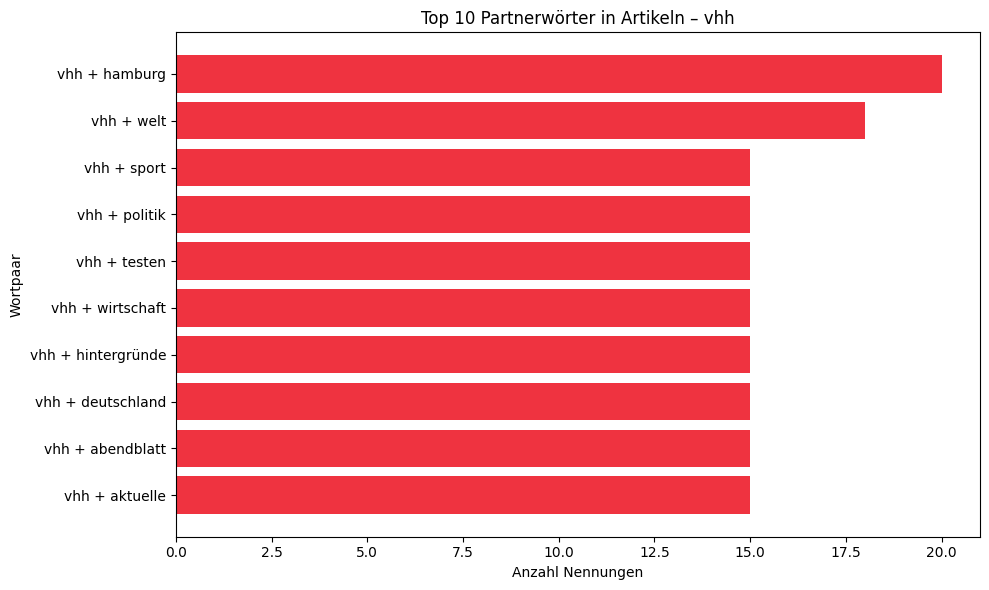

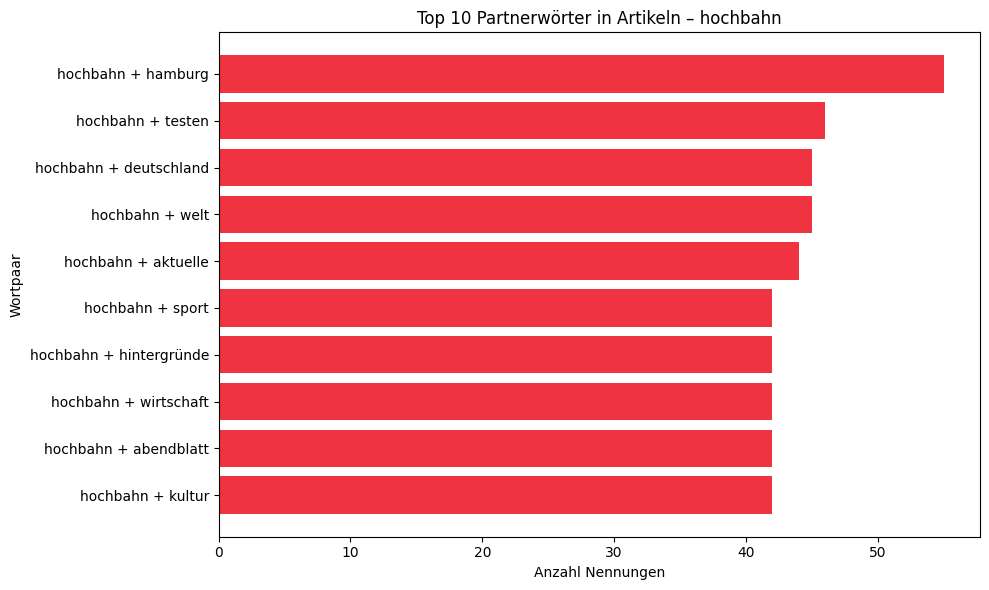

In [366]:
# Balkendiagramm Top Partnerwörter pro Jahr
for kw in all_keywords:
    plot_top_pairs_total(co_total_dict[kw], keyword=kw, topn=10, farben=farben)

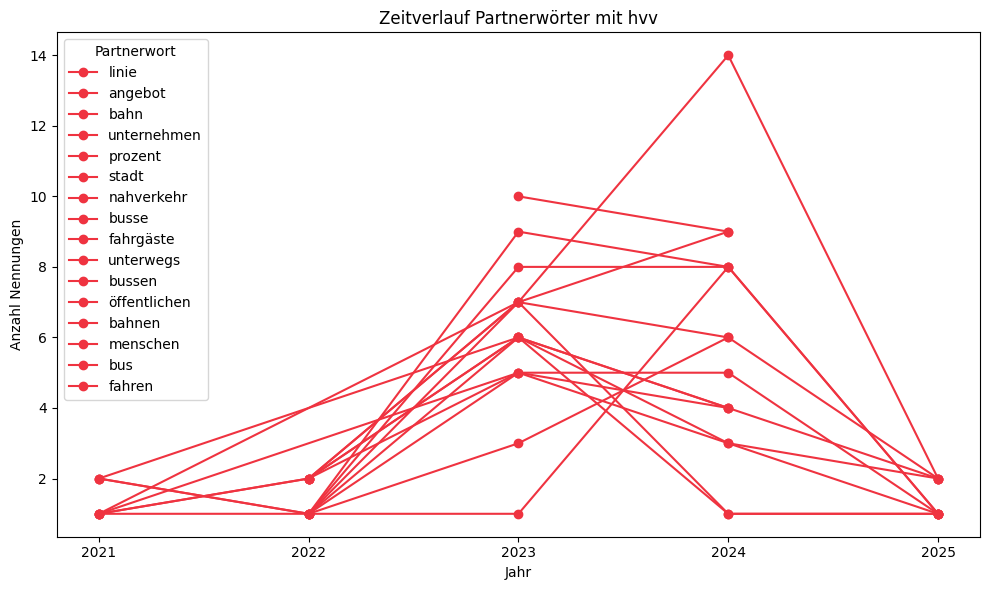

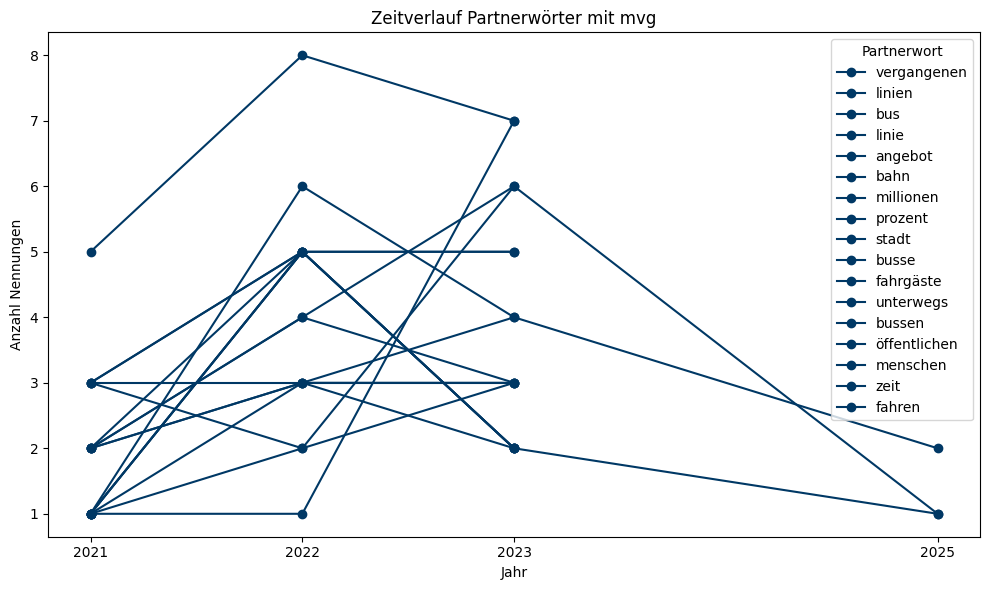

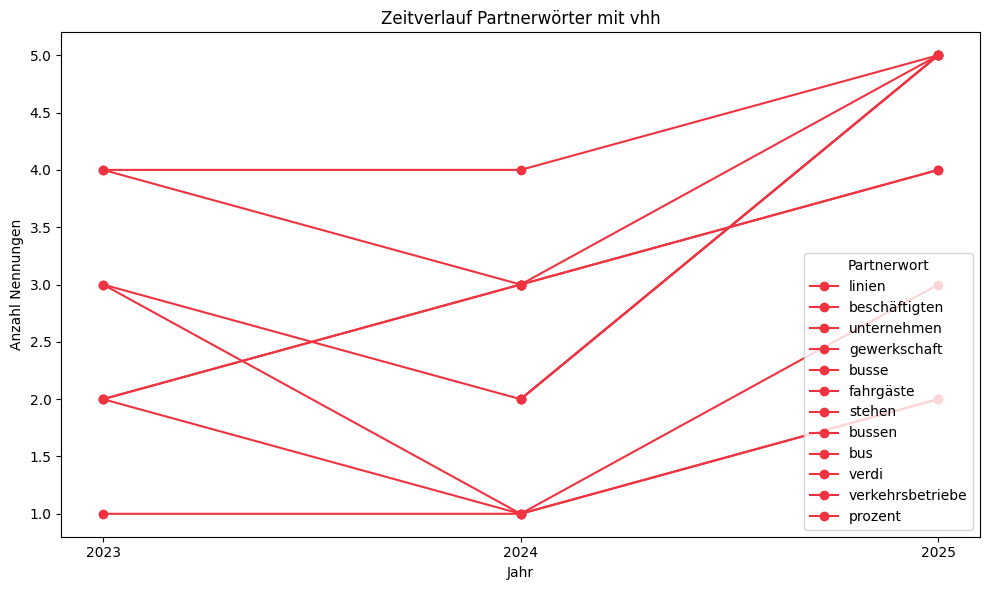

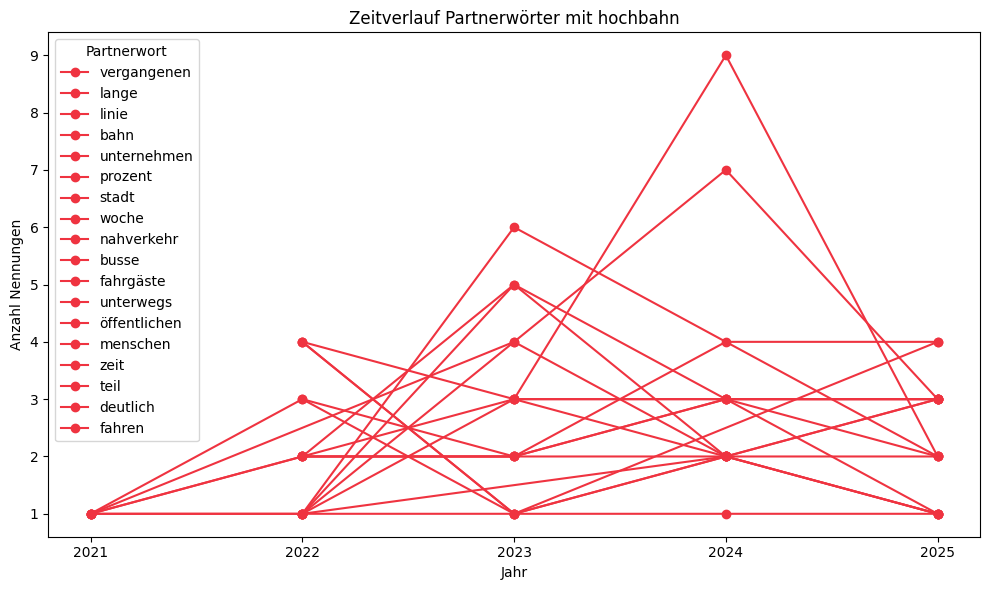

In [367]:
# Vorbereitung: Gemeinsame Partnerwörter pro Benchmark-Keyword speichern
common_partners = {}

# Schleife über Benchmark-Keywords 
for kw in keywords_benchmark:
    
    # Set der Top-50 Partnerwörter für BVG
    partners_bvg = set(co_total_dict["bvg"]["word2"].head(50))
    
    # Set der Top-50 Partnerwörter für das aktuelle Benchmark-Keyword
    partners_kw = set(co_total_dict[kw]["word2"].head(50))
    
    # Gemeinsame Begriffe
    common = list(partners_bvg & partners_kw)
    
    # Gemeinsame Partnerwörter speichern
    common_partners[kw] = common
    
    # Visualidierung
    plot_trends_for_partners(co_year_dict[kw], keyword=kw, partners=common, farben=farben)